In [1]:
from __future__ import division
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex="mathjax")

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import scipy as sp


In [ ]:
"""
확률 모형이란

데이터 분포 묘사의 문제점
기술 통계 등의 방법으로 자료의 분포를 기술하는 방법은 불확실하며 
대략적인 정보만을 전달할 뿐이며 자세한 혹은 완벽한 정보를 전달하기 어렵다.

예를 들어 다음과 같이 1,000개의 데이터가 있다. 
데이터 생성에는 scipy의 확률 분포 명령을 이용하였다.
"""

In [4]:
sp.random.seed(0)
x = sp.random.normal(size=1000)

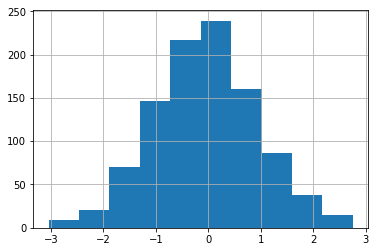

In [5]:
ns, bins, ps = plt.hist(x, bins=10)
plt.grid()
plt.show()

In [6]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,10
0,-3.046143,-2.465593,-1.885043,-1.304494,-0.723944,-0.143394,0.437156,1.017706,1.598255,2.178805,2.759355
1,0.009000,0.020000,0.070000,0.146000,0.217000,0.239000,0.160000,0.086000,0.038000,0.015000,NaN


In [ ]:
"""

이 히스토그램에서 -0.143394 부터 0.437156 사이의 값이 
전체의 약 24%를 차지하고 있음을 알 수 있다.

그럼 만약 -0.01 부터 0.01 사이의 구간에 대한 정보를 얻고 싶다면? 
더 세부적인 구간에 대해 정보를 구하고 싶다면 
히스토그램의 구간을 더 작게 나누어야 한다.
"""

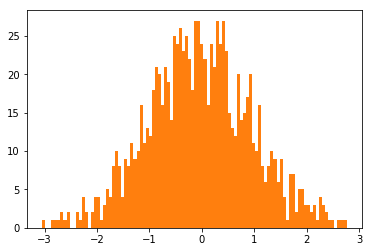

In [9]:
ns, bins, ps = plt.hist(x, bins=100)
plt.show()

In [ ]:
"""

정확한 묘사를 위해 구간의 수를 증가시키면 몇 가지 문제가 발생한다.

우선 구간의 간격이 작아지면서 하나의 구간에 있는 자료의 수가 점점 적어진다.
만약 구간 수가 무한대에 가깝다면 하나의 구간 폭은 0으로 수렴하고 
해당 구간의 자료 수도 0으로 수렴할 것이다. 
따라서 분포의 상대적인 모양을 살펴보기 힘들어진다.

더 큰 문제는 분포를 묘사하기 위한 정보가 증가한다는 점이다. 
데이터의 분포를 묘사하는 이유는 적은 갯수의 숫자를 통해 
데이터의 전반적인 모습을 빠르게 파악하기 위한 것인데 
묘사를 위한 정보의 양이 증가하면 원래의 목적을 잃어버린다.
"""

In [ ]:
"""
확률 모형과 데이터 생성

이러한 문제를 해결하기 위해 만들어진 것이 확률 모형(probability model)이다.
확률 모형은 추후 설명할 확률 변수(random variable)라는 것을 이용하여 
데이터 분포를 수학적으로 정의하는 방법을 말한다.

확률 모형론에서는 데이터 그 자체에는 의미가 없으며 
데이터의 분포 특성만이 중요하다고 생각한다. 
따라서 분포 특성이 같은 데이터는 실질적으로 동일한 정보를 주는 데이터라고 본다.

우리는 보통 조사(research) 과정을 통해 데이터를 하나 하나 수집한다. 
이러한 과정은 주사위를 던지는 행위에 비유할 수 있다. 
즉 조사를 통해 데이터를 하나 확보하는 일은 주사위를 던져 
위를 향하는 눈금의 숫자를 종이에 적는 일과 같다고 보는 것이다.
"""

In [11]:
# 1~6 주사위를 100번 던진다고 가정한 데이터
sp.random.seed(0)
x = sp.random.randint(1, 7, 100)
x

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
       5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4, 4,
       3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4, 4, 3,
       4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3, 6, 6, 6,
       1, 2, 6, 2, 4, 1, 6, 1])

In [39]:
s = pd.Series(x)
s
s1 = pd.Series(s.value_counts().sort_index())
s1

1    19
2    18
3    11
4    20
5    18
6    14
dtype: int64

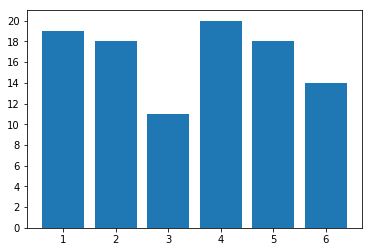

In [47]:
# 주사위 눈금 빈도수 bar plot 표현
plt.bar(s1.index, s1)
plt.yticks(range(0, 21, 2))
plt.show()

In [ ]:
"""
확률 분포 함수

그러면 확률 모형에서는 데이터를 생성하는 주사위, 즉 확률 변수의 확률적 특성은 
어떻게 정의할까?

이 확률적 특성을 정의하는 것이 
확률 분포 함수(probability distribution function) 
또는 확률 밀도 함수(probability density function)라고 불리우는 수학 함수이다. 이 때 이 함수들의 계수를 모수(parameter)라고 부른다.

"""

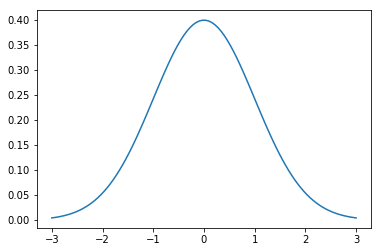

In [70]:
#  scipy를 사용하여 
# 평균 0, 표준편차 1인 
# 표준 정규 분포(standard normal distribution)의 모양을 그린것이다.
x = np.linspace(-3, 3, 100)
y = sp.stats.norm.pdf(x)
plt.plot(x, y)
plt.show()